In [53]:
import nltk
from nltk.corpus import stopwords
import math
import csv
from scipy.spatial import distance
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words+=["restaurant", "restaurants", "food", "would", "u", "n't", "ve"]
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.preprocessing.text import Tokenizer
from nltk import pos_tag
import re
from sklearn.preprocessing import normalize
from nltk.stem import WordNetLemmatizer 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from nltk.cluster import KMeansClusterer, \
cosine_distance
from sklearn import metrics
from sklearn.cluster import KMeans
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
%matplotlib inline
from gensim.models import word2vec
import logging

### Create Yelp Developer credentials and fire API requests


In order to get the data in the required format for building the model, we proceeded to load the reviews by firing yelp API requests. For brevity, only the attributes contained in the dataset that are relevant to our project will be listed. Since we only wanted to train our model on restaurant reviews data, we loaded the data which provides information about the businesses so we could filter the reviews by business category.

In [ ]:
import requests
import json
import csv
ids=[]
reviews=[]
tokens=[]
list_of_tokens=[]
city=['New York city','Jersey City','Hoboken','Edison','Plainsbro','South Plainfield','North Brunswick','Newport','Pittsburg']
business_url='https://api.yelp.com/v3/businesses/search'
api_key='vtELkYddh0zT63Wd47_1uYR9WJfIM2lJ2Bu71VQIocpkCM-IIzdsxQABZLZyW5F75OAn3YttiR4NeyxmL8ar_EcXDNwLAI9i_zPia2CXxHPK3FtDpAhFt818dP6uXXYx'
headers = {'Authorization': 'Bearer %s' % api_key}
for k in range (0,8):
    params = {'term':'restaurants','location':city[k],'limit':'50'}
    req1=requests.get(business_url, params=params, headers=headers)
    for i in range (0,50):
        data1=((json.loads(req1.text))['businesses'])[i]['id']
        ids.append(data1)
        url = "https://api.yelp.com/v3/businesses/"+ids[i]+"/reviews"
        req = requests.get(url, headers=headers)
        data=(json.loads(req.text))['reviews']
        for i in range(0,len(data)):
            reviews.append(data[i]['text'])
print((reviews))

csvfile = "C:/Users/Manish/Documents/BIA660_Assignments/Final_project/sample.csv"
fields = ['label','review']
#Assuming res is a flat list
with open(csvfile, "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerow(fields)
    i=0
    for val in reviews:
        writer.writerow([i,val])    
        i+=1


## Data Collection 
    - Collected Business_ids that belong to Restaurants from PA state and Pittsburg City
    -Mapped the business_ids with reviews data set and extracted 6908 records on to Final_RawDataset.csv


In [ ]:
for fno in range(1,528):
    x="C:\\Users\\moni0\\Downloads\\splitcsv-d91f99f5-320d-4f51-ac6a-ed57b212f40a-results\\yelp_review-"+str(fno)+".csv"
    #print(x)
    data_train = pd.read_csv(x,header=0)
    Match_text=[]
    Match_bid=[]
    li1_list=[]
    li1=data_train['business_id']
    for x in range(0,len(li1)):
        li1_list.append(li1[x])
    li2=data_train['text']
   # print(li1_list)
    for x in range(0,len(lines)):
        if lines[x] in li1_list:
            Match_text.append(fno)
            Match_bid.append(lines[x])  
    list_of_tuples = list(zip(Match_text, Match_bid)) 
    df = pd.DataFrame(list_of_tuples, columns = ['fno', 'bid']) 
    with open("Reviews_file.csv",'a', encoding='utf-8') as f:
        df.to_csv(f,header=False)
print("over")

In [ ]:
x="C:\\Users\\moni0\\Downloads\\splitcsv-d91f99f5-320d-4f51-ac6a-ed57b212f40a-results\\yelp_review-40.csv"
data_train = pd.read_csv(x,header=0)
y="C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\reviews_file_1.csv"
data_bid=pd.read_csv(y,header=0)
bid=data_bid['bid']
text_lst=[]
text_bid=[]
for x in range(0,len(bid)):
    for y in range(0,len(data_train)): 
        if bid[x]==data_train['business_id'][y]:
            text_lst.append(data_train['text'][y])
            text_bid.append(data_train['business_id'][y].replace('\n',''))
list_of_tuples1 = list(zip(text_lst, text_bid)) 
df1 = pd.DataFrame(list_of_tuples1, columns = ['text', 'bid']) 
with open("Reviews_text_file.csv",'a', encoding='utf-8') as f:
    df1.to_csv(f,header=False)
print("over")

### Insights of Final_RawDataset.csv before cleaning

Raw dataset obtained from Yelp with business id and restaurent reviews without any duplicates

In [2]:
data_set = pd.read_csv("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Final_RawDataSet.csv",header=0)
print("There are no Duplicates : "+str(len(data_set.Reviews_Text.unique())))
data_set.head(2)


There are no Duplicates : 6907


,Business_ID,Reviews_Text
0,575BoZY8tDPcfSRcdsUNLw,I couldn't resist trying this ENP after it was...
1,a5xUI7TvsNhM5gZr6KowDg,This is my favorite Chinese place in Pittsburg...


# Raw Data Visualization

raw data visualization obtained with help of word cloud

(-0.5, 399.5, 199.5, -0.5)

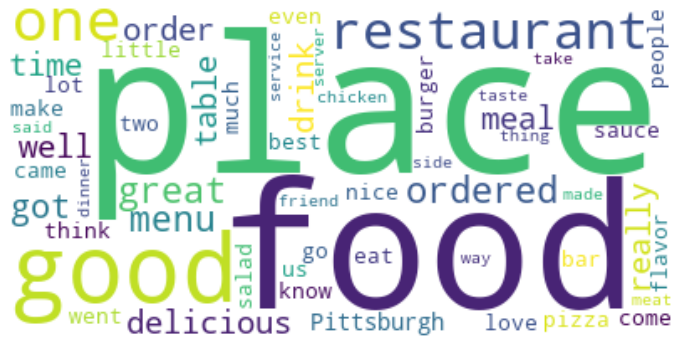

In [3]:
#with stopwords
text = " ".join(x for x in data_set.Reviews_Text)  # raw reviews

wordcloud = WordCloud(min_font_size = 10, background_color = "white").generate(text)

plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

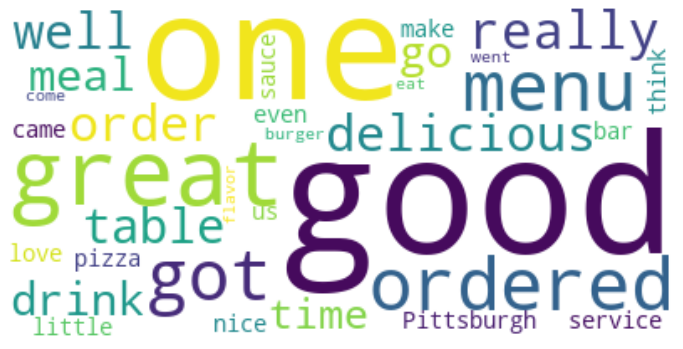

In [4]:
#without stopwords
text = " ".join(x for x in data_set.Reviews_Text)  # raw reviews
stop_words = set(STOPWORDS)
stop_words.update(["restaurant","restaurants", "food", "place"])
wordcloud = WordCloud(stopwords = stop_words, min_font_size = 10, background_color = "white").generate(text)
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

# Tokenization

Each “entity” that is a part of whatever was split up based on rules. For examples, each word is a token when a sentence is “tokenized” into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.
So basically tokenizing involves splitting sentences and words from the body of the text. here we are tokenizing on our review text

In [5]:
 Review_list_tokens=[]
word_cld=[]
for review in data_set['Reviews_Text']:
        tokens = []
        text_lower = review.lower()
        pattern=r'\w+'
        words=nltk.regexp_tokenize(text_lower, pattern)
        for word in words:
            if len(word) > 2:
                if word not in stop_words:
                    tokens.append(word)
                    word_cld.append(word)
        Review_list_tokens.append(tokens)


# Tokenized Data Visualization

visualization of tokenized word with help of word cloud

(-0.5, 399.5, 199.5, -0.5)

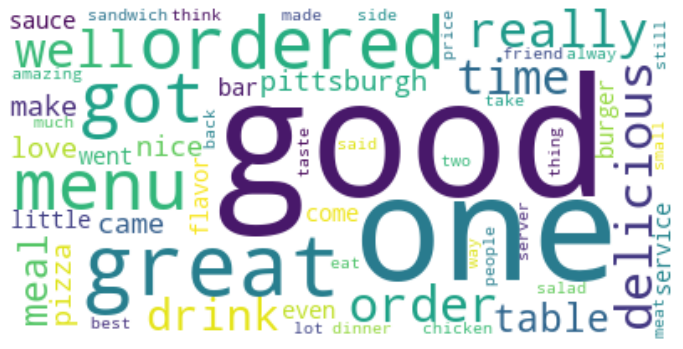

In [6]:
text = " ".join(x for x in word_cld)  # raw reviews
wordcloud = WordCloud(min_font_size = 10, background_color = "white").generate(text)
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

# Basic Sentiment Analysis

What is sentiment analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

Why sentiment analysis?



Business: In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some
products.

In our case we are performing sentimental analysis on yelp reviews

In [7]:
def sentiment_analysis(review_list, positive_words, negative_words):
    
    sentiment_list=[]
    negations=["not", "no", "isn't", "wasn't", "aren't", \
               "weren't", "don't", "didn't", "cannot", \
               "couldn't", "won't", "neither", "nor"]
    
    for review in review_list:
        tokens = []
        text_lower = review.lower()
        pattern=r'\w+'
        words=nltk.regexp_tokenize(text_lower, pattern)
        stop_words = nltk.corpus.stopwords.words('english')
        for word in words:
            if len(word) > 2:
                if word not in stop_words:
                    tokens.append(word)
        sentiment = None

        positive_tokens=[]
        negative_tokens=[]

        # a positive word is preceded by negation words
        for idx, token in enumerate(tokens):
            if token in positive_words:
                if idx>0:
                    if tokens[idx-1] not in negations:
                        positive_tokens.append(token)
                else:
                    positive_tokens.append(token)

        # a positive word not preceded by negation words                
        for idx, token in enumerate(tokens):
            if token in negative_words:
                if idx>0:
                    if tokens[idx-1] in negations:
                        positive_tokens.append(token)
                else:
                    positive_tokens.append(token)

        # a negative word is preceded by negation words
        for idx, token in enumerate(tokens):
            if token in negative_words:
                if idx>0:
                    if tokens[idx-1] not in negations:
                        negative_tokens.append(token)
                else:
                    negative_tokens.append(token)

        # a negative word not preceded by negation words          
        for idx, token in enumerate(tokens):
            if token in positive_words:
                if idx>0:
                    if tokens[idx-1] in negations:
                        negative_tokens.append(token)
                else:
                    negative_tokens.append(token)


        if len(positive_tokens) > len(negative_tokens):
            sentiment = '1'
        elif len(positive_tokens) < len(negative_tokens):
            sentiment = '2'
        elif len(positive_tokens) == len(negative_tokens):
            sentiment = '3'
        
        sentiment_list.append(sentiment)
    
    
    csvfile = "C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Final_Cleaned_OverallSentiment_Dataset.csv"
    fields = ['Business_ID','Reviews_Text','Raw_sentiment']
    with open(csvfile, "w",encoding='utf-8') as output:
        writer = csv.writer(output, lineterminator='\n')
        writer.writerow(fields)
        for (bid, r_txt,senti) in zip(data_set['Business_ID'], data_set['Reviews_Text'],sentiment_list):
            writer.writerow([bid,r_txt,senti])
    
    print('SentimentAnalysis Exported!')

In [8]:
with open("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\positive-words.txt",'r') as f:
        positive_words=[line.strip() for line in f]
        
with open("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\negative-words.txt",'r') as f:
        negative_words=[line.strip() for line in f]
        
sentiment_analysis(data_set.Reviews_Text, positive_words, negative_words)

SentimentAnalysis Exported!


# Sentiment Visualization

visualization of about 6908 reviews in form of graphs for the sentimental analysis performed
Positive Reviews -> 1
Negative Reviews -> 2
Neutral Reviews -> 3

In [9]:
csvfile = "C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Final_Cleaned_OverallSentiment_Dataset.csv"

with open(csvfile, 'r',encoding='utf-8') as data:
    counter = Counter()
    for row in csv.DictReader(data):
        counter[row['Raw_sentiment']] += 1

    positive = counter['1']
    negative = counter['2']
    neutral = counter['3']

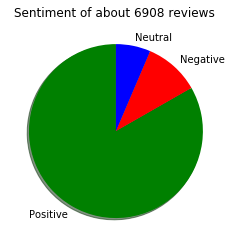

In [10]:
colors = ['green', 'red','blue']
sizes = [positive, negative, neutral]
labels = 'Positive', 'Negative', 'Neutral'

## use matplotlib to plot the chart
plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

plt.title("Sentiment of about 6908 reviews ")
plt.show()

In [11]:
csvfile = "C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Final_Cleaned_OverallSentiment_Dataset.csv"
df1 = pd.read_csv(csvfile)
df1.head()


,Business_ID,Reviews_Text,Raw_sentiment
0,575BoZY8tDPcfSRcdsUNLw,I couldn't resist trying this ENP after it was...,2
1,a5xUI7TvsNhM5gZr6KowDg,This is my favorite Chinese place in Pittsburg...,3
2,LQFmktF43j2NPncKdNd9mg,"4 or 5 years ago, the wait wasn't so bad at Fa...",1
3,BGGR5ekPK6YqMRHgYNJGsw,"If West Liberty Avenue became more developed, ...",1
4,BGGR5ekPK6YqMRHgYNJGsw,"This place has re-opened, I'm happy to report....",1


In [12]:
print(f' Number of Positive reviews : {len(df1.loc[df1.Raw_sentiment == 1])}')
print(f' Numbr of Negative reviews : {len(df1.loc[df1.Raw_sentiment == 2])}')
print(f' Numbr of Neutral reviews : {len(df1.loc[df1.Raw_sentiment == 3])}')

 Number of Positive reviews : 5752
 Numbr of Negative reviews : 712
 Numbr of Neutral reviews : 444


In [13]:
pos = df1.loc[df1.Raw_sentiment == 1, 'Reviews_Text'].copy().reset_index(drop=True)
neg = df1.loc[df1.Raw_sentiment == 2, 'Reviews_Text'].copy().reset_index(drop=True)
nue = df1.loc[df1.Raw_sentiment == 3, 'Reviews_Text'].copy().reset_index(drop=True)

In [14]:
for i in range(4):
    print(''.join(pos[np.random.randint(0, len(pos))]))
    print('\n')





If you go on a Saturday, be prepared to wait.  To me it's worth it.  Also, don't expect good service, to me, that's just part of the experience.


Favorite pittsburgh pizza shop around. Doesnt quite compare to my dear pizza my heart @ home, but definitely havent found anything better in the area. Staff is very friendly. Pizza is greasy but good.




Drinks are incredible here. So many cocktails! I saw that the rye buck, sazerac, and the manhattan were under classics (and they're my favorites!). At $10 each, they were at a nice price point, too. I was able to grab a seat at the bar, and just devour my drink and do some hardcore people watching. It's definitely a lively atmosphere with a ton of energy! Wish we could have tried the food, but I guess there's always a next time. We were there for one drink, and then we were out to explore the rest of downtown.


I don't even like seitan, or tacos really, but I sometimes find myself craving Round Corner's seitan tacos. Ample cilantro and

In [15]:
for i in range(4):
    print(''.join(neg[np.random.randint(0, len(neg))]))
    print('\n')









I would say this is a good bar to go with a large drunk group, and that's it. If you are by yourself or in a small group, Cappy's or Mardi Gras would be much better IMO.


Went here ONE time and will never go back.  The service was the slowest I've ever seen anywhere.  The breakfast was Meh and very over priced.  Whatever floats your boat, but me and my money will never go there again.




Pittsburgh's airport is pretty good as airports go. Wifi, lots of food and shopping, and not the longest lines you'll ever see. But (and this is a big but) the stupid shuttle train thing to get to the gates is a major pain. It could be worse, though. This could be O'Hare.






I don't give out one star reviews often, but the to-go food from this particular Chili's is definitely worthy of this dubious honor!




In [16]:
for i in range(4):
    print(''.join(nue[np.random.randint(0, len(nue))]))
    print('\n')







The location (second floor, over the river and through the woods)  and the atmosphere absolutely suck, but the food definitely didn't disappoint. I knocked off 1 star for sketchiness, but the place redeemed itself when our order came out.  If this place found a  little nicer location on street level, it would own.








The milk shake was vanilla and fine.


We were forgotten in the corner table and the breakfast food was just average. Maybe we'll try out their lunch\/dinner options sometime.


Maybe we just ordered the wrong items, but the pad thai and pad see ew were just seriously underwhelming. Oversauced, little flavor otherwise, and weird vegetables like canned corn made the meal forgettable somewhat hard to finish to be honest. The only reason we came over here was because Thai Gourmet was always closed and we just wanted a meal nearby. That said, Thai Gourmet has in my opinion a much more authentic feel to it, and we'll probably take more notice as to when it is actuall

In [17]:
neg = pd.concat([pd.DataFrame(neg), pd.DataFrame(np.zeros(neg.shape), columns=['class'])], 1)
nue = pd.concat([pd.DataFrame(nue), pd.DataFrame(np.zeros(nue.shape), columns=['class'])], 1)
pos = pd.concat([pd.DataFrame(pos), pd.DataFrame(np.ones(pos.shape), columns=['class'])], 1)

# Mean, standard deviation and max length of negative reviews


In [18]:
lens = neg['Reviews_Text'].str.len()
lens.mean(), lens.std(), lens.max()

(612.5702247191011, 565.8957258700907, 4151)

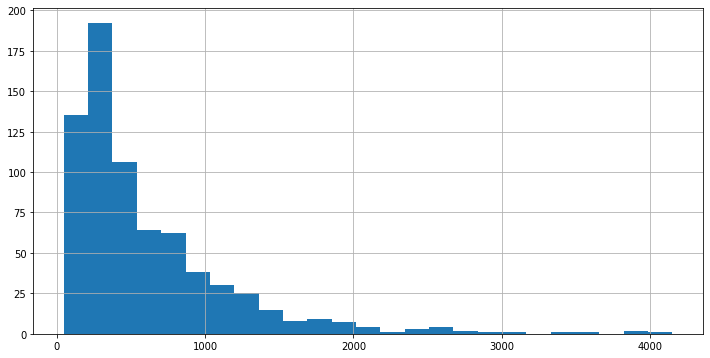

In [19]:
lens.hist(figsize=(12, 6), bins=25);

# Mean, standard deviation and max length of positive reviews


In [20]:
lens = pos['Reviews_Text'].str.len()
lens.mean(), lens.std(), lens.max()

(687.9542767732962, 616.1706275167293, 5067)

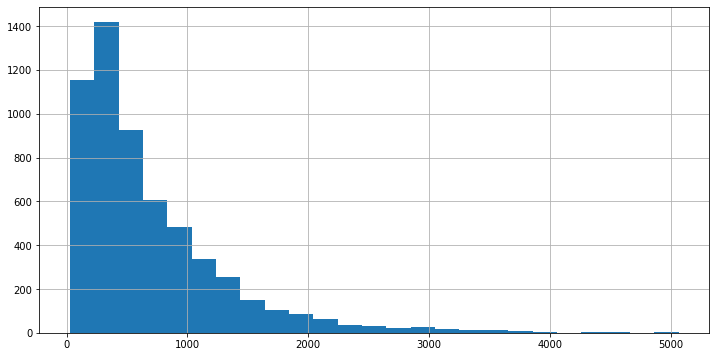

In [21]:
lens.hist(figsize=(12, 6), bins=25);

# Mean, standard deviation and max length of neutral reviews


In [22]:
lens = nue['Reviews_Text'].str.len()
lens.mean(), lens.std(), lens.max()

(421.0, 425.7539110525277, 3135)

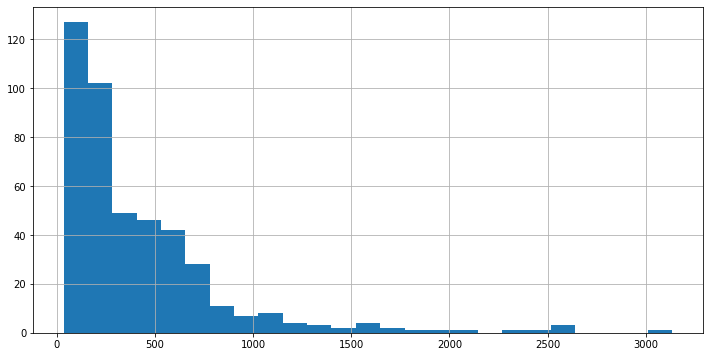

In [23]:
lens.hist(figsize=(12, 6), bins=25);

### Manual Labelling the reviews

We manually labelled our reviews by giving the synonyms of each category and got the following dataset based on the category: setting, service , food , price


In [66]:
# We label the reviews in 5 aspects ['Food','Service','Price','Setting','General']
def checkCategory():
    
    category = []
    setting_category = []
    service_category = []
    food_category = []
    price_category = []
    review_category_list = []
    Gen_count=0
    set_count=0
    ser_count=0
    food_count=0
    price_count=0
    setting_category=data_set.Reviews_Text.str.contains('bar|clean|hygiene|ambience|healthy|place|disgusting|dirty|pure|wash|atmosphere|location')
    service_category=data_set.Reviews_Text.str.contains('wait|staff|service|maintain|servicing|rude|smile|tender|tendering|waiter|worker')
    food_category=data_set.Reviews_Text.str.contains('pizza|sauce|meal|drink|delicious|food|meat|flavor|sushi|chicken|soup|starter|lunch|dinner|menu')
    price_category=data_set.Reviews_Text.str.contains('price|costly|cheap|charge|amount|rate|sum|total|bill|damage')
    for cat in range(0,len(setting_category)):
        
        aspect=[]
        if setting_category[cat]==True:
            set_count+=1
            aspect.append('Setting')
        if service_category[cat]==True:
            ser_count+=1
            aspect.append('Service')
        if food_category[cat]==True:
            food_count+=1
            aspect.append('Food')
        if price_category[cat]==True :
            price_count+=1
            aspect.append('Price')
        review_category_list.append(aspect)
    for cat1 in range(0,len(review_category_list)): 
           if len(review_category_list[cat1])==0:
                Gen_count+=1
                review_category_list[cat1]=['General']
    overall_count_val=[Gen_count,set_count,ser_count,food_count,price_count]
    overall_count=['General Count:'+str(Gen_count),'Setting Count:'+str(set_count),'Service Count:'+str(ser_count),\
                   'Food Count:'+str(food_count),'Price Count:'+str(price_count)]
    return overall_count_val,overall_count,review_category_list

In [67]:
overall_count_val,overall_count,review_category_list=checkCategory()
csvfile = "C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Final_Cleaned_OverallSentiment_Dataset.csv"
data_set_senti=pd.read_csv(csvfile,header=0)
fields = ['Business_ID','Reviews_Text','Raw_sentiment','Category']
with open('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv', "w",encoding='utf-8') as output:
    writer = csv.writer(output, lineterminator='\n')
    writer.writerow(fields)
    for (bid, r_txt,senti,r_cat) in zip(data_set_senti['Business_ID'], data_set_senti['Reviews_Text'],data_set_senti['Raw_sentiment'],review_category_list):
        r_cat = ', '.join(r_cat)
        writer.writerow([bid,r_txt,senti,r_cat])


In [68]:
data_set_labelled = pd.read_csv("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv",header=0)
data_set_labelled.head(4)

,Business_ID,Reviews_Text,Raw_sentiment,Category
0,575BoZY8tDPcfSRcdsUNLw,I couldn't resist trying this ENP after it was...,2,"Setting, Service, Food, Price"
1,a5xUI7TvsNhM5gZr6KowDg,This is my favorite Chinese place in Pittsburg...,3,"Setting, Food"
2,LQFmktF43j2NPncKdNd9mg,"4 or 5 years ago, the wait wasn't so bad at Fa...",1,Service
3,BGGR5ekPK6YqMRHgYNJGsw,"If West Liberty Avenue became more developed, ...",1,"Setting, Service, Food"


In [69]:
print(overall_count)

['General Count:343', 'Setting Count:4169', 'Service Count:3545', 'Food Count:5787', 'Price Count:2304']


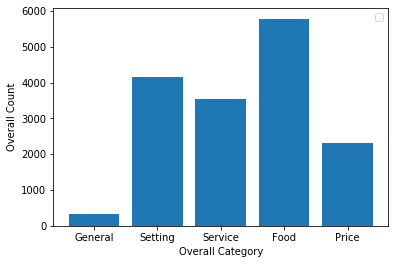

In [71]:
plt.bar(['General','Setting','Service','Food','Price'],overall_count_val)
#overall_count_val.plot(kind="bar")
plt.legend()
plt.xlabel('Overall Category')
plt.ylabel('Overall Count')
plt.show()

In [72]:
x=data_set_labelled.Category.value_counts()

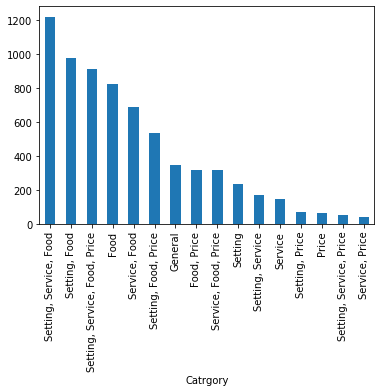

In [73]:
plt.xlabel('Catrgory')
x.plot(kind="bar")

In [74]:

Yelp = pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv',header=0)


In [75]:
Yelp.head()


,Business_ID,Reviews_Text,Raw_sentiment,Category
0,575BoZY8tDPcfSRcdsUNLw,I couldn't resist trying this ENP after it was...,2,"Setting, Service, Food, Price"
1,a5xUI7TvsNhM5gZr6KowDg,This is my favorite Chinese place in Pittsburg...,3,"Setting, Food"
2,LQFmktF43j2NPncKdNd9mg,"4 or 5 years ago, the wait wasn't so bad at Fa...",1,Service
3,BGGR5ekPK6YqMRHgYNJGsw,"If West Liberty Avenue became more developed, ...",1,"Setting, Service, Food"
4,BGGR5ekPK6YqMRHgYNJGsw,"This place has re-opened, I'm happy to report....",1,"Setting, Service, Price"


In [76]:
grouped = Yelp.groupby("Category")

In [77]:
grouped.size()

Category
Food                              825
Food, Price                       316
General                           343
Price                              64
Service                           144
Service, Food                     690
Service, Food, Price              315
Service, Price                     42
Setting                           236
Setting, Food                     977
Setting, Food, Price              533
Setting, Price                     69
Setting, Service                  169
Setting, Service, Food           1220
Setting, Service, Food, Price     911
Setting, Service, Price            54
dtype: int64

In [78]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Food
(825, 4)
<class 'pandas.core.frame.DataFrame'>
Food, Price
(316, 4)
<class 'pandas.core.frame.DataFrame'>
General
(343, 4)
<class 'pandas.core.frame.DataFrame'>
Price
(64, 4)
<class 'pandas.core.frame.DataFrame'>
Service
(144, 4)
<class 'pandas.core.frame.DataFrame'>
Service, Food
(690, 4)
<class 'pandas.core.frame.DataFrame'>
Service, Food, Price
(315, 4)
<class 'pandas.core.frame.DataFrame'>
Service, Price
(42, 4)
<class 'pandas.core.frame.DataFrame'>
Setting
(236, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Food
(977, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Food, Price
(533, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Price
(69, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Service
(169, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Service, Food
(1220, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Service, Food, Price
(911, 4)
<class 'pandas.core.frame.DataFrame'>
Setting, Service, Price
(54, 4)
<class 'pandas.core.frame.DataFrame'>


In [79]:
grouped["Raw_sentiment"].agg(np.mean)

Category
Food                             1.275152
Food, Price                      1.253165
General                          1.466472
Price                            1.359375
Service                          1.312500
Service, Food                    1.243478
Service, Food, Price             1.257143
Service, Price                   1.261905
Setting                          1.457627
Setting, Food                    1.195496
Setting, Food, Price             1.180113
Setting, Price                   1.362319
Setting, Service                 1.295858
Setting, Service, Food           1.149180
Setting, Service, Food, Price    1.149286
Setting, Service, Price          1.314815
Name: Raw_sentiment, dtype: float64

In [80]:
grouped.agg(np.mean)

,Raw_sentiment
Category,
Food,1.275152
"Food, Price",1.253165
General,1.466472
Price,1.359375
Service,1.312500
"Service, Food",1.243478
"Service, Food, Price",1.257143
"Service, Price",1.261905
Setting,1.457627


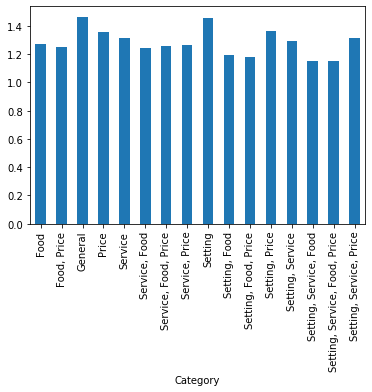

In [81]:
aspect = grouped.agg(np.mean)
aspect["Raw_sentiment"].plot(kind="bar")

In [82]:
grouped = Yelp.groupby("Category")["Raw_sentiment"]
w = grouped.apply(lambda x:x.value_counts())
print(w)

Category                        
Food                           1     674
                               3      76
                               2      75
Food, Price                    1     259
                               2      34
                               3      23
General                        1     237
                               3      54
                               2      52
Price                          1      45
                               2      15
                               3       4
Service                        1     108
                               2      27
                               3       9
Service, Food                  1     569
                               2      74
                               3      47
Service, Food, Price           1     255
                               2      39
                               3      21
Service, Price                 1      32
                               2       9
                        

# Distribution of reviews in each category by sentiment

describing percentage of each reviews based on category

In [83]:
table = pd.pivot_table(Yelp, values=["Reviews_Text"], index=["Category"],columns=["Raw_sentiment"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)

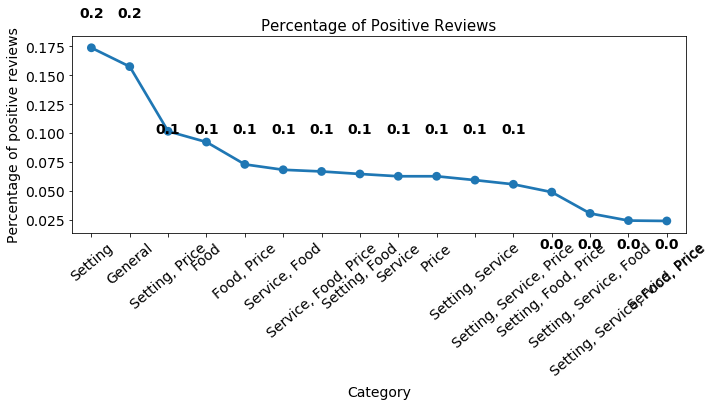

In [84]:
get_ipython().run_line_magic('matplotlib', 'inline')
import utils
import importlib
importlib.reload(utils)
from utils import *
%matplotlib inline
import seaborn as sns
table = pd.pivot_table(Yelp, values=["Reviews_Text"], index=["Category"],columns=["Raw_sentiment"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(1)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

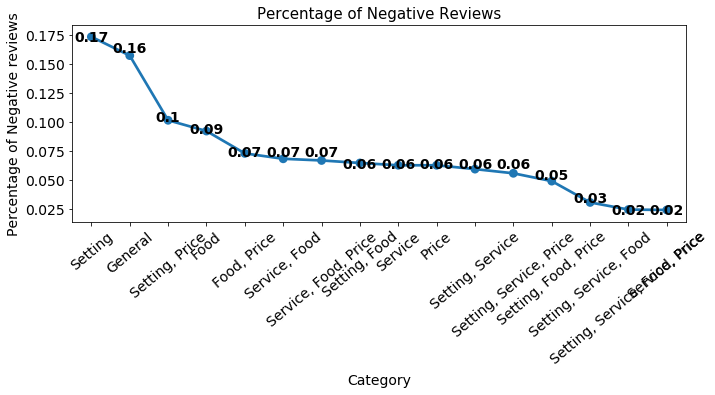

In [85]:
table = pd.pivot_table(Yelp, values=["Reviews_Text"], index=["Category"],columns=["Raw_sentiment"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of Negative reviews', fontsize=14)
plt.title('Percentage of Negative Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

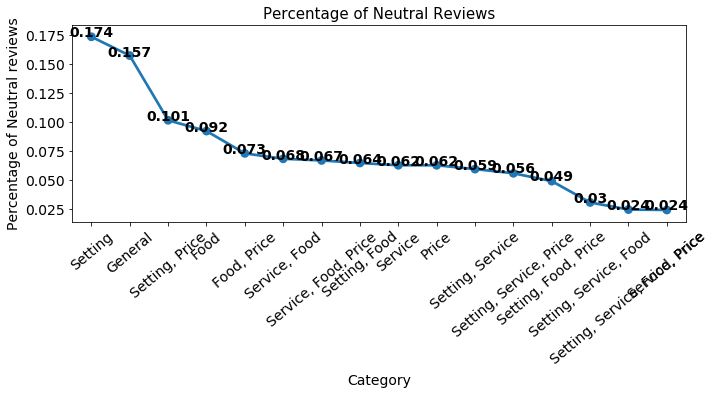

In [86]:
table = pd.pivot_table(Yelp, values=["Reviews_Text"], index=["Category"],columns=["Raw_sentiment"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(11,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of Neutral reviews', fontsize=14)
plt.title('Percentage of Neutral Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(3)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

# TF-IDF,Lemmatization and POS tagging

It may not be possible manually provide the correct POS tag for every word for large texts. So, instead, we performed the correct POS tag for each word, map it to the right input character that the WordnetLemmatizer accepts and pass it as the second argument to lemmatize().

So how to get the POS tag for a given word?

In nltk, it is available through the nltk.pos_tag() method. It accepts only a list (list of words), even if its a single word.


In [93]:
wordnet_lemmatizer = WordNetLemmatizer()
def get_doc_tokens_lemma_pos(doc):
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation and wordnet_lemmatizer.lemmatize(token)]
    tagged_pos=pos_tag(tokens)
    print(tagged_pos)
    return None

In [94]:
df_reviews=pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv',header=0)
get_doc_tokens_lemma_pos(df_reviews.Reviews_Text[0])

[('could', 'MD'), ('resist', 'VB'), ('trying', 'VBG'), ('enp', 'JJ'), ('rebuilt', 'JJ'), ('maybe', 'NN'), ("'s", 'POS'), ('enp', 'NN'), ('long', 'JJ'), ('time', 'NN'), ('probably', 'RB'), ('better', 'RBR'), ('part', 'NN'), ('decade', 'NN'), ('disappointed', 'JJ'), ('service', 'NN'), ('truly', 'RB'), ('slow', 'JJ'), ('like', 'IN'), ('10', 'CD'), ('minutes', 'NNS'), ('get', 'VBP'), ('water', 'NN'), ('salad', 'NN'), ('bar', 'NN'), ('seemed', 'VBD'), ('half', 'JJ'), ('selection', 'NN'), ('remember', 'VB'), ('cottage', 'NN'), ('cheese', 'JJ'), ('upside', 'JJ'), ('ranch', 'NN'), ('tasty', 'JJ'), ('remember', 'VB'), ('real', 'JJ'), ('reason', 'NN'), ('went', 'VBD'), ('order', 'NN'), ('wrong', 'JJ'), ('ordered', 'VBD'), ('fried', 'JJ'), ('pickles', 'NNS'), ('...', ':'), ('got', 'VBD'), ('burger', 'JJ'), ('instead', 'RB'), ('server', 'RB'), ('beyond', 'IN'), ('apologetic', 'JJ'), ('fixed', 'VBN'), ('less', 'RBR'), ('five', 'CD'), ('minutes', 'NNS'), ('hard', 'JJ'), ('understand', 'VBP'), ('firs

In [95]:

def get_doc_tokens(doc):
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    token_count={token:tokens.count(token) for token in set(tokens)}
    return token_count

def tfidf(docs):
    docs_tokens={idx:get_doc_tokens(doc) \
             for idx,doc in enumerate(docs)}
    dtm=pd.DataFrame.from_dict(docs_tokens, orient="index" )
    dtm=dtm.fillna(0) 
    tf=dtm.values
    doc_len=tf.sum(axis=1)
    tf=np.divide(tf.T, doc_len).T
    df=np.where(tf>0,1,0)
    smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(df, axis=0)+1))+1    
    smoothed_tf_idf=tf*smoothed_idf
    print(smoothed_tf_idf)
    return smoothed_tf_idf

In [96]:
df_reviews=pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv',header=0)
tfidf(df_reviews.Reviews_Text)

[[0.05375626 0.08131229 0.03916473 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.14292864 0.14292864 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.48144384]]


array([[0.05375626, 0.08131229, 0.03916473, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.14292864, 0.14292864,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48144384]])

# Naive Bayes

In [97]:
def Naive_Bayes(text, labels):
    print ("Naive Bayes")
    mlb = MultiLabelBinarizer()
    X = mlb.fit_transform(labels)
    print("Labels")
    print(mlb.classes_)
    X_train, X_test, Y_train, Y_test = train_test_split(text, X, test_size = 0.30, random_state = 0)
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df = 4, stop_words = stop_words)),
        ('clf', OneVsRestClassifier(MultinomialNB()))])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print('Accuracy score is {}'.format(accuracy_score(Y_test, predicted)))
    print("predicted:")
    print(predicted[0:2])
    print("actual:")
    print(Y_test[0:2])
    print(classification_report(Y_test, predicted, target_names = mlb.classes_))


In [98]:
model_df = pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv', header = 0)
text = model_df['Reviews_Text'].values
category = model_df['Category'].values
labels = []
for cat in category:
    tag = cat.split(", ")  
    labels.append(tag)
model_data = list(zip(*(text, labels)))
text = [x[0] for x in model_data]
Naive_Bayes(text, labels)

Naive Bayes
Labels
['Food' 'General' 'Price' 'Service' 'Setting']
Accuracy score is 0.3014954172696575
predicted:
[[1 0 0 1 1]
 [1 0 0 1 1]]
actual:
[[1 0 0 1 1]
 [1 0 0 1 1]]
              precision    recall  f1-score   support

        Food       0.85      1.00      0.92      1753
     General       0.00      0.00      0.00       104
       Price       0.93      0.14      0.25       678
     Service       0.70      0.86      0.77      1069
     Setting       0.64      0.99      0.78      1278

   micro avg       0.74      0.83      0.78      4882
   macro avg       0.62      0.60      0.54      4882
weighted avg       0.75      0.83      0.74      4882
 samples avg       0.73      0.82      0.75      4882



C:\Users\moni0\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Linear SVC Model

In [99]:
def SVCModel(text, labels):
    print ("LinearSVC")
    mlb = MultiLabelBinarizer()
    X = mlb.fit_transform(labels)
    print("Labels")
    print(mlb.classes_)
    X_train, X_test, Y_train, Y_test = train_test_split(text, X, test_size = 0.30, random_state = 0)
    classifier = Pipeline([('tfidf', TfidfVectorizer(min_df = 5, stop_words = stop_words)),
        ('clf', OneVsRestClassifier(LinearSVC()))])
    classifier.fit(X_train, Y_train)
    predicted = classifier.predict(X_test)
    print('Accuracy score is {}'.format(accuracy_score(Y_test, predicted)))
    print("predicted:")
    print(predicted[0:2])
    print("actual:")
    print(Y_test[0:2])
    print(classification_report(Y_test, predicted, target_names = mlb.classes_))


In [100]:
model_df = pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv', header = 0)
text = model_df['Reviews_Text'].values
category = model_df['Category'].values
labels = []
for cat in category:
    tag = cat.split(", ")  
    labels.append(tag)
model_data = list(zip(*(text, labels)))
text = [x[0] for x in model_data]
SVCModel(text, labels)

LinearSVC
Labels
['Food' 'General' 'Price' 'Service' 'Setting']
Accuracy score is 0.5962373371924746
predicted:
[[1 0 0 1 1]
 [1 0 0 1 1]]
actual:
[[1 0 0 1 1]
 [1 0 0 1 1]]
              precision    recall  f1-score   support

        Food       0.90      0.95      0.93      1753
     General       0.46      0.06      0.10       104
       Price       0.88      0.74      0.80       678
     Service       0.89      0.86      0.87      1069
     Setting       0.94      0.93      0.93      1278

   micro avg       0.90      0.88      0.89      4882
   macro avg       0.81      0.71      0.73      4882
weighted avg       0.90      0.88      0.88      4882
 samples avg       0.87      0.86      0.84      4882



C:\Users\moni0\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# Clustering using KMeans

In [196]:
def cluster_kmean():
    ip_file= pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv', header = 0)
    data_train=ip_file[:4800]
    data_test = ip_file[4801:]
    tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=5) 
    dtm= tfidf_vect.fit_transform(data_train.Reviews_Text)  
    test_dtm = tfidf_vect.transform(data_test.Reviews_Text)
    num_clusters=5
    clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, \
                          repeats=20)
    clusters = clusterer.cluster(dtm.toarray(), \
                             assign_clusters=True)
    predicted = [clusterer.classify(v) for v in test_dtm.toarray()]
    print("KMeans")
    confusion_df = pd.DataFrame(list(zip(data_test.Category, predicted)),\
                            columns = ["label", "cluster"])
    confusion_df.head()
    dfa=pd.crosstab( index=confusion_df.cluster, columns=confusion_df.label)
    dfMax = dfa.idxmax(axis=1)
    print(dfa)
    cluster_dict = {0: dfMax[0], 1: dfMax[1], 2: dfMax[2], 3:dfMax[3], 4:dfMax[4]}
    print("cluster 0:Topic "+dfMax[0])
    print("cluster 1:Topic "+dfMax[1])
    print("cluster 2:Topic "+dfMax[2])
    print("cluster 3:Topic "+dfMax[3])
    print("cluster 4:Topic "+dfMax[4])
    predicted_target=[cluster_dict[i] for i in predicted]
    print(metrics.classification_report(data_test.Category, predicted_target))
    return None
        

In [197]:
cluster_kmean()

C:\Users\moni0\Anaconda3\lib\site-packages\nltk\cluster\util.py:133: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


KMeans
label    Food  Food, Price  General  Price  Service  Service, Food  \
cluster                                                              
0          47           15       21      3        9             66   
1          31           11        1      1        0             11   
2          53           22       32      8       15             35   
3          28            9       14      2       15             52   
4         113           35       35      7        4             51   

label    Service, Food, Price  Service, Price  Setting  Setting, Food  \
cluster                                                                 
0                          17               1       20             69   
1                           4               1        0             30   
2                          22               2       31             95   
3                          27               1        6             24   
4                          26               1        7          

C:\Users\moni0\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                               precision    recall  f1-score   support

                         Food       0.20      0.53      0.29       272
                  Food, Price       0.00      0.00      0.00        92
                      General       0.00      0.00      0.00       103
                        Price       0.00      0.00      0.00        21
                      Service       0.00      0.00      0.00        43
                Service, Food       0.00      0.00      0.00       215
         Service, Food, Price       0.00      0.00      0.00        96
               Service, Price       0.00      0.00      0.00         6
                      Setting       0.00      0.00      0.00        64
                Setting, Food       0.00      0.00      0.00       309
         Setting, Food, Price       0.00      0.00      0.00       168
               Setting, Price       0.00      0.00      0.00        21
             Setting, Service       0.00      0.00      0.00        46
     

# Topic Modelling using LDA 

In [104]:
def get_topics(reviews): 
    tf_vectorizer = CountVectorizer(max_df=0.1, min_df=1, stop_words=stop_words, analyzer='word') 
    tf = tf_vectorizer.fit_transform(reviews) 
    tf_feature_names = tf_vectorizer.get_feature_names() 
    num_topics = 5 
    X_train, X_test = train_test_split(tf, test_size=0.3, random_state=0) 
    lda = LatentDirichletAllocation(n_components=num_topics, max_iter=20,verbose=1, evaluate_every=1, n_jobs=1, random_state=0).fit(X_train)
    num_top_words = 40
    for topic_idx, topic in enumerate(lda.components_):
        print("Topic %d:" % (topic_idx))
        words = [(tf_feature_names[i], topic[i]) \
                 for i in topic.argsort()[::-1][0:num_top_words]]
        print(words)
        print("\n")
    f, axarr = plt.subplots(3, 2, figsize=(12, 12));
    for topic_idx, topic in enumerate(lda.components_):
        f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
        wordcloud = WordCloud(width=600, height=500, margin=0, background_color="black");
        _ = wordcloud.generate_from_frequencies(frequencies=f);
        _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
        _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
        _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

    plt.tight_layout()
    plt.show()

iteration: 1 of max_iter: 20, perplexity: 4785.1568
iteration: 2 of max_iter: 20, perplexity: 4552.3149
iteration: 3 of max_iter: 20, perplexity: 4478.2717
iteration: 4 of max_iter: 20, perplexity: 4428.2722
iteration: 5 of max_iter: 20, perplexity: 4388.8335
iteration: 6 of max_iter: 20, perplexity: 4354.3891
iteration: 7 of max_iter: 20, perplexity: 4324.4944
iteration: 8 of max_iter: 20, perplexity: 4299.9871
iteration: 9 of max_iter: 20, perplexity: 4279.1603
iteration: 10 of max_iter: 20, perplexity: 4260.3815
iteration: 11 of max_iter: 20, perplexity: 4243.5070
iteration: 12 of max_iter: 20, perplexity: 4228.5441
iteration: 13 of max_iter: 20, perplexity: 4214.6350
iteration: 14 of max_iter: 20, perplexity: 4202.3892
iteration: 15 of max_iter: 20, perplexity: 4191.5651
iteration: 16 of max_iter: 20, perplexity: 4181.8205
iteration: 17 of max_iter: 20, perplexity: 4172.7227
iteration: 18 of max_iter: 20, perplexity: 4164.4511
iteration: 19 of max_iter: 20, perplexity: 4156.9577
it

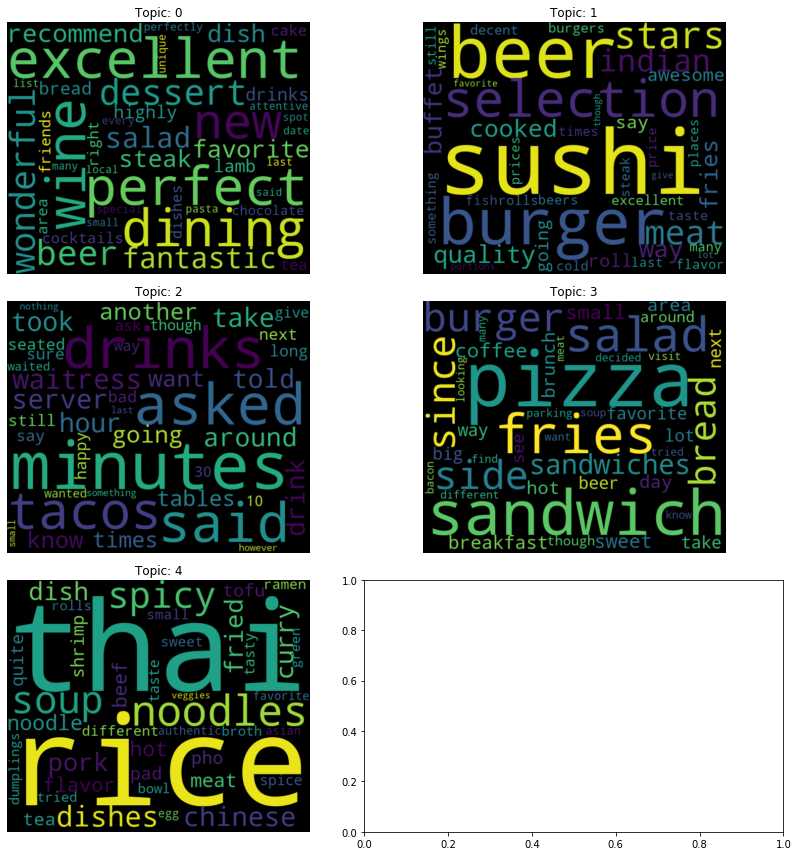

In [105]:
df = pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv', header = 0, engine='python', encoding='utf-8', error_bad_lines=False)
reviews_txt = df.Reviews_Text
get_topics(reviews_txt)

# Text Classification with 1D Convolutional Neural Networks

In [106]:
df = pd.read_csv("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv", header = 0)
review_text = df['Reviews_Text'].values
tags = df['Category'].values
labels = []
review_text=review_text
tags=tags
MAX_NB_WORDS = 10000
MAX_DOC_LEN = 500
EMBEDDING_DIM = 100
for x in tags:
    tag = x.split(", ")   
    labels.append(tag)
data = list(zip(*(review_text, labels)))
text = [x[0] for x in data]
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)
voc = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', truncating='post')
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(\
                    padded_sequences, Y,\
                    test_size=0.3, random_state=1)
main_input = Input(shape=(MAX_DOC_LEN,), dtype='int32', name='main_input')

embed_1 = Embedding(input_dim=MAX_NB_WORDS + 1,
                    output_dim=EMBEDDING_DIM,
                    input_length=MAX_DOC_LEN,
                    name='embedding')(main_input)
conv1d_1 = Conv1D(filters=64, kernel_size=1,
                  name='conv_unigram',
                  activation='relu')(embed_1)
pool_1 = MaxPooling1D(MAX_DOC_LEN - 1 + 1, \
                      name='pool_unigram')(conv1d_1)
flat_1 = Flatten(name='flat_unigram')(pool_1)
conv1d_2 = Conv1D(filters=64, kernel_size=2, \
                  name='conv_bigram', \
                  activation='relu')(embed_1)
pool_2 = MaxPooling1D(MAX_DOC_LEN - 2 + 1, name='pool_bigram')(conv1d_2)
flat_2 = Flatten(name='flat_bigram')(pool_2)
conv1d_3 = Conv1D(filters=64, kernel_size=3, \
                  name='conv_trigram', activation='relu')(embed_1)
pool_3 = MaxPooling1D(MAX_DOC_LEN - 3 + 1, name='pool_trigram')(conv1d_3)
flat_3 = Flatten(name='flat_trigram')(pool_3)

z = Concatenate(name='concate')([flat_1, flat_2, flat_3])
drop_1 = Dropout(rate=0.5, name='dropout')(z)
dense_1 = Dense(192, activation='relu')(drop_1)

preds = Dense(5, activation='sigmoid', name='output')(dense_1)

model = Model(inputs=main_input, outputs=preds)
print(model.summary())
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
BATCH_SIZE = 64
NUM_EPOCHES = 5

training = model.fit(X_train, y_train, \
                     batch_size=BATCH_SIZE, \
                     epochs=NUM_EPOCHES, \
                     validation_data=[X_test, y_test])

pred=model.predict(X_test)
pred = np.where(pred > 0.5, 1, 0)
print(classification_report(y_test, pred, target_names = mlb.classes_))
print(mlb.classes_)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 500)           0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 500, 100)      1000100     main_input[0][0]                 
____________________________________________________________________________________________________
conv_unigram (Conv1D)            (None, 500, 64)       6464        embedding[0][0]                  
____________________________________________________________________________________________________
conv_bigram (Conv1D)             (None, 499, 64)       12864       embedding[0][0]                  
___________________________________________________________________________________________

C:\Users\moni0\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


# Performance of CNN

In [107]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 96.35%


       train_acc  train_loss   val_acc  val_loss
epoch                                           
0       0.450694    0.796816  0.521278  0.725667
1       0.248121    0.907863  0.362479  0.835698
2       0.157171    0.952436  0.212709  0.924840
3       0.137585    0.963145  0.134749  0.959007
4       0.126485    0.963531  0.094921  0.971210


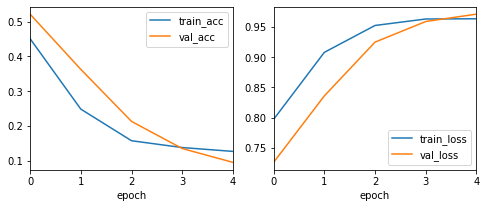

In [108]:
df=pd.DataFrame.from_dict(training.history)
df.columns=["train_acc", "train_loss", \
            "val_acc", "val_loss"]
df.index.name='epoch'
print(df)
# plot training history
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3));

df[["train_acc", "val_acc"]].plot(ax=axes[0]);
df[["train_loss", "val_loss"]].plot(ax=axes[1]);
plt.show();

# Prediction for Remaining Samples

In [109]:
df = pd.read_csv("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv", header = 0)
review_text = df['Reviews_Text'].values
tags = df['Category'].values
labels = []
MAX_NB_WORDS = 10000
MAX_DOC_LEN = 500
for x in tags:
    tag = x.split(", ")   
    labels.append(tag)
data = list(zip(*(review_text, labels)))
text = [x[0] for x in data]
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)
voc = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = pad_sequences(sequences, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', truncating='post')
new_pred = model.predict(padded_sequences)
new_pred = np.where(new_pred > 0.5, 1, 0)
print(len(new_pred))

6908


In [110]:
Food_pred = new_pred[:, 0]
Food_pred = np.where(Food_pred == 1, 'Food', '')
Food_pred = [[i] for i in Food_pred]

Gen_pred = new_pred[:, 1]
Gen_pred = np.where(Gen_pred == 1, 'General', '')
Gen_pred = [[i] for i in Gen_pred]

Price_pred = new_pred[:, 2]
Price_pred = np.where(Price_pred == 1, 'Price', '')
Price_pred = [[i] for i in Price_pred]

ser_pred = new_pred[:, 3]
ser_pred = np.where(ser_pred == 1, 'Service', '')
ser_pred = [[i] for i in ser_pred]

set_pred = new_pred[:, 4]
set_pred = np.where(set_pred == 1, 'Setting', '')
set_pred = [[i] for i in set_pred]

labels=list(zip(Food_pred, Price_pred, ser_pred, set_pred))
print(len(labels))
  

6908


In [112]:
df = pd.read_csv("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Manual_Labelled_Dataset.csv", header = 0)
fields = ['Business_ID','Reviews_Text','Raw_sentiment','Manual_Category','Predicted_Category']
with open('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\predicted_Labelled_Dataset.csv', 'w',encoding='utf-8') as fp:
    writer = csv.writer(fp, lineterminator='\n')
    writer.writerow(fields)
    for (bid, r_txt,senti,r_cat,p_cat) in zip(df['Business_ID'], df['Reviews_Text'],df['Raw_sentiment'],df['Category'],labels):
        res = [' '.join(tups) for tups in p_cat] 
        p_cat = [i for i in res if i]
        p_cat = ', '.join(p_cat)
        writer.writerow([bid,r_txt,senti,r_cat,p_cat])
print("over") 

over


# Check few samples

In [113]:
pred_df = pd.read_csv("C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\predicted_Labelled_Dataset.csv", header = 0)
pred_labels = pred_df['Predicted_Category']
reviews = pred_df['Reviews_Text']
Man_labels = pred_df['Manual_Category']

print("Review: \n", reviews[1])
print("\n Predicted Label: \n", pred_labels[1])
print("\n Manual Label: \n", Man_labels[1])

print("\n Review: \n", reviews[7])
print("\n Predicted Label: \n", pred_labels[7])
print("\n Manual Label: \n", Man_labels[7])

print("\n Review: \n", reviews[255])
print("\n Predicted Label: \n", pred_labels[255])
print("\n Manual Label: \n", Man_labels[255])


print("\n Review: \n", reviews[308])
print("\n Predicted Label: \n", pred_labels[308])
print("\n Manual Label: \n", Man_labels[308])


Review: 






Nice atmosphere.  Weird location.

 Predicted Label: 
 Food, Setting

 Manual Label: 
 Setting, Food

 Review: 
 I think Smoke is probably fine if you are a carnivore, but as a mostly vegan vegetarian, I just can't get into it. Their regular tortillas contain buttermilk which surprised me on my first time there and I was feeling really bummed about the lack of choices...but they graciously said they had time to make some vegan ones for me right then and there! Great service! So, I was told, if you call ahead they will specially make vegan corn tortillas  - which are also gluten free - for you. But ultimately, the fillings of the veggie taco are nothing to write home about, nor worth leaving the house for (beans, pico, roasted pepper sauce); I would like to see some more vegetables in the filling and would love some avocado. Not only that, on my last visit my veg taco was served cold (my companions' food was hot, so it seemed to be a kitchen timing problemo). The space is

# Aspect Based-Getting Word2Vector

In [118]:

data=pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\Final_RawDataSet.csv', header=0)


stop_words = list(stopwords.words('english'))

sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc.lower()) \
                 if token not in stop_words and token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in data["Reviews_Text"]]

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
size = 200
wv_model = word2vec.Word2Vec(sentences, \
            min_count=5, size=200, iter=10,\
            window=5, workers=4 )
print("over")

over


# Food Aspect Terms

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.

For generating word cloud in Python, modules needed are – matplotlib, pandas and wordcloud. 

Advantages of Word Clouds :

Analyzing customer and employee feedback.
Identifying new SEO keywords to target.

Drawbacks of Word Clouds :

Word Clouds are not perfect for every situation.
Data should be optimized for context.

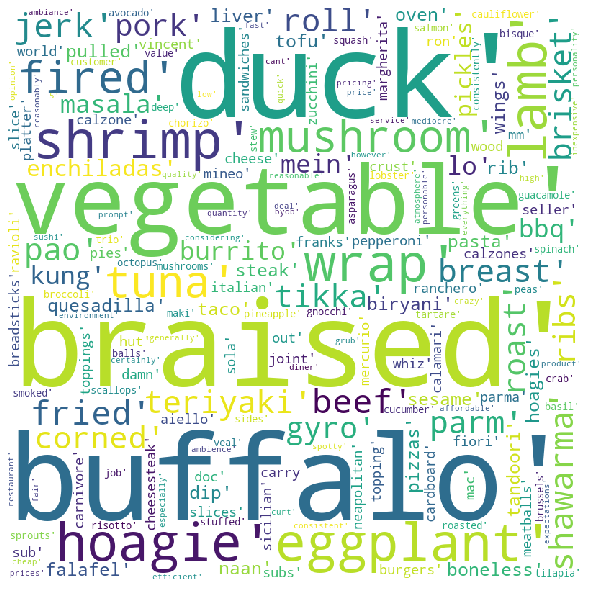

In [149]:
#WordCloud for food aspect term
chicken = wv_model.wv.most_similar('chicken', topn=50)
food_aspect_terms = [f[0] for f in chicken]
pizza = wv_model.wv.most_similar('pizza', topn=50)
food_aspect_terms.extend([f[0] for f in pizza])
pasta = wv_model.wv.most_similar('pasta', topn=50)
food_aspect_terms.extend([f[0] for f in pasta])
t = wv_model.wv.most_similar('food', topn=50)
food_aspect_terms.extend([f[0] for f in t])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(food_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Service Aspect Terms

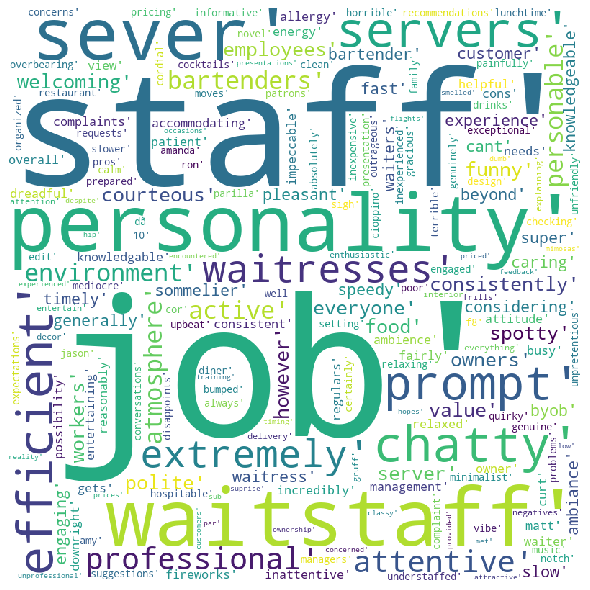

In [144]:
#WordCloud for service aspect term
service_aspect_terms = wv_model.wv.most_similar('service', topn=200)
#service_aspect_terms.extend(wv_model.wv.most_similar('wait', topn=100))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(service_aspect_terms))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
service_aspect_terms.append('service')

# Setting Aspect Terms

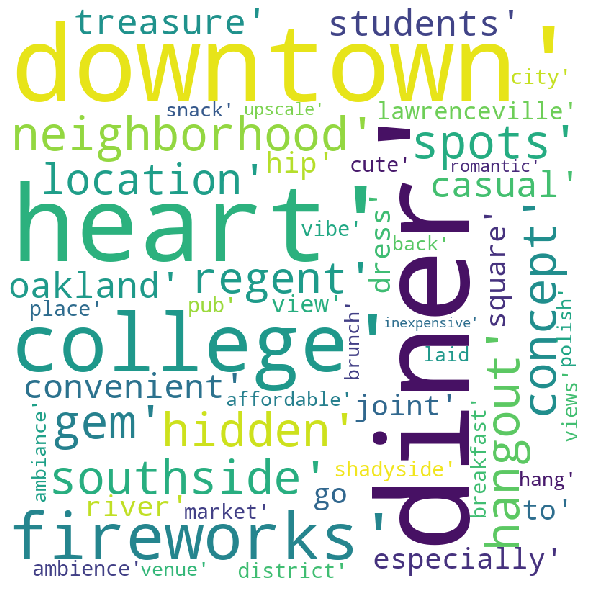

In [142]:
#WordCloud for setting aspect term
setting_aspect_terms = wv_model.wv.most_similar('spot', topn=50)
#setting_aspect_terms.extend(wv_model.wv.most_similar('cleanliness', topn=500))
#setting_aspect_terms.extend(wv_model.wv.most_similar('atmosphere', topn=500))
#setting_aspect_terms.extend(wv_model.wv.most_similar('place', topn=500))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(setting_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Price Aspect Terms

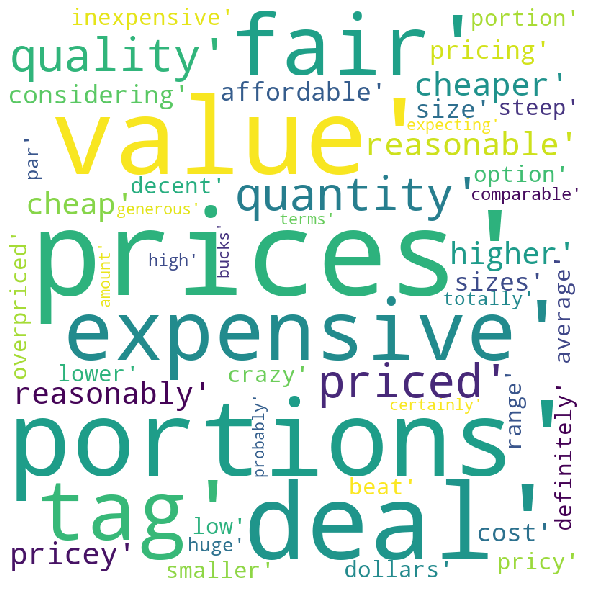

In [147]:
#WordCloud for price aspect term
price_aspect_terms = wv_model.wv.most_similar('price', topn=50)
#price_aspect_terms.extend(wv_model.wv.most_similar('costly', topn=100))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(price_aspect_terms))
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [143]:
setting_terms=[i[0] for i in setting_aspect_terms if i[0] not in service_terms]
#setting_terms=[i for i in service_terms if i not in price_terms]
#service_terms=[i for i in service_terms if i not in food_aspect_terms]
print(setting_terms[:10])
setting_terms.append('spot')
if 'spot' in setting_terms:
    print('yes')

['diner', 'downtown', 'heart', 'college', 'fireworks', 'neighborhood', 'gem', 'spots', 'southside', 'hidden']
yes


In [145]:
service_terms=[i[0] for i in service_aspect_terms if i[0] not in setting_terms]
service_terms=[i for i in service_terms if i not in price_terms]
service_terms=[i for i in service_terms if i not in food_aspect_terms]
print(service_terms[:10])
service_terms.append('service')
if 'service' in service_terms:
    print('yes')

['job', 'staff', 'personality', 'waitstaff', 'sever', 'chatty', 'servers', 'efficient', 'prompt', 'extremely']
yes


In [146]:
service_terms.remove('food')
if 'food' in service_terms:
    print('yes')
    

In [148]:
price_terms=[i[0] for i in price_aspect_terms if i[0] not in service_terms]
price_terms=[i for i in price_terms if i not in setting_terms]
#service_terms=[i for i in service_terms if i not in food_aspect_terms]
print(price_terms[:10])
price_terms.append('price')
if 'price' in price_terms:
    print('yes')

['portions', 'deal', 'expensive', 'tag', 'fair', 'quantity', 'quality', 'reasonable', 'cheaper', 'cheap']
yes


In [152]:
food_aspect_terms=[i for i in food_aspect_terms if i not in service_terms]
food_aspect_terms=[i for i in food_aspect_terms if i not in setting_terms]
food_aspect_terms=[i for i in food_aspect_terms if i not in price_terms]
print(food_aspect_terms[:10])
#price_terms.append('price')
food_aspect_terms.append('food')
food_aspect_terms.append('pizza')
food_aspect_terms.append('pasta')
food_aspect_terms.append('chicken')
food_aspect_terms.append('beer')
food_aspect_terms.append('burritos')
if 'beer' in food_aspect_terms:
    print('yes')

['fried', 'buffalo', 'beef', 'jerk', 'shawarma', 'teriyaki', 'roast', 'parm', 'breast', 'duck']
yes


In [141]:
food_aspect_terms=[]
setting_terms=[]
service_terms=[]
price_terms=[]


# General Aspect Terms

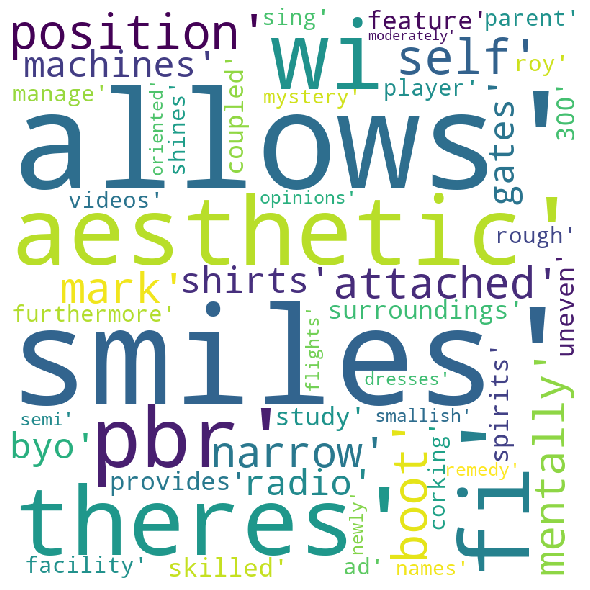

In [133]:
general_aspect_terms = wv_model.wv.most_similar('broad', topn=50)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(str(general_aspect_terms))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [134]:
general_terms=[i[0] for i in general_aspect_terms]
print(general_terms[:10])

['smiles', 'allows', 'aesthetic', 'theres', 'wi-fi', 'pbr', 'position', 'self', 'boot', 'attached']


In [181]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import spacy
import pandas as pd
import statistics
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def Aspect_Based(x,y):
    sid_obj = SentimentIntensityAnalyzer() 
    data=pd.read_csv('C:\\Users\\moni0\\Desktop\\Masters Fall 19\\web mining\\Project\\Data\\predicted_Labelled_Dataset.csv', header=0)
    data_set=data[x:y]
    #category = []
    data_reviews=data_set.Reviews_Text
    aspect =[]
    polarity_list = []
    polarity_se_list = []
    polarity_st_list = []
    polarity_p_list = []
    polarity_f_list = []
    for item in data_reviews:
        print("\n"+"Review Text:  "+item)
        item=item.lower()
        sentences = sent_tokenize(item)
        nlp = spacy.load('en')
        print("\n"+"ASPECT BASED RESULT")
        category = []
        for i in sentences:
            print("\n"+i+"\n")
            senti=sid_obj.polarity_scores(i) 
            if senti['compound'] >= 0.05 : 
                print("Sentiment: Positive") 
               # sen_pos+=1
                polarity=senti['compound']

            elif senti['compound'] <= - 0.05 : 
                print("Sentiment: Negative")
                #sen_neg +=1
                polarity=senti['compound']

            else : 
                print("Sentiment: Neutral")  
                #sen_neu +=1
                polarity=senti['compound']

            temp = nltk.pos_tag(nltk.word_tokenize(i))
            nounList = [val for val in temp if "NN"]# in val[1] or "JJ" in val[1] or "VB" in val[1]]
            s=0
            se=0
            p=0
            f=0
            for val in nounList: 
                #print(val)
                if val[0] in service_terms:
                    #category.append("service")
                    if s==0:
                        s+=1
                        polarity_se_list.append(polarity)
                        print("service")

                elif val[0] in setting_terms:
                   # category.append("setting") 
                    if se==0:
                        se+=1
                        polarity_st_list.append(polarity)
                        print("setting")

                elif val[0] in price_terms:
                    #category.append("price")
                    if p==0:
                        p+=1
                        polarity_p_list.append(polarity)
                        print("price")

                elif val[0] in food_aspect_terms:
                    #category.append("food")
                    if f==0:
                        f+=1
                        polarity_f_list.append(polarity)
                        print("food")

    return           


       

# Checking Aspect terms and sentiment for Random Reviews

In [157]:
Aspect_Based(3,4)


Review Text:  If West Liberty Avenue became more developed, I think this place would stay around.  Very good food and service.  Good beer

ASPECT BASED RESULT

If West Liberty Avenue became more developed, I think this place would stay around.

Sentiment: Positive
setting

Very good food and service.

Sentiment: Positive
food
service

Good beer

Sentiment: Positive
food


In [167]:
Aspect_Based(7,8)


Review Text:  I think Smoke is probably fine if you are a carnivore, but as a mostly vegan vegetarian, I just can't get into it. Their regular tortillas contain buttermilk which surprised me on my first time there and I was feeling really bummed about the lack of choices...but they graciously said they had time to make some vegan ones for me right then and there! Great service! So, I was told, if you call ahead they will specially make vegan corn tortillas  - which are also gluten free - for you. But ultimately, the fillings of the veggie taco are nothing to write home about, nor worth leaving the house for (beans, pico, roasted pepper sauce); I would like to see some more vegetables in the filling and would love some avocado. Not only that, on my last visit my veg taco was served cold (my companions' food was hot, so it seemed to be a kitchen timing problemo). The space is cute, with especially good service and the food pleases most of my friends, so I am going to have to go with 3 s

In [183]:
Aspect_Based(120,121)


Review Text:  Honestly the best pizza in the south hills that isn't Mineo's.  Fresh, hot, pizza.  Generous toppings.  Friendly staff.  Seating inside for folks that want to take their kids.  The only problem is that the wait time wasn't very accurate which was odd since I had gone on a Sunday night.

ASPECT BASED RESULT

honestly the best pizza in the south hills that isn't mineo's.

Sentiment: Positive
food

fresh, hot, pizza.

Sentiment: Positive
food

generous toppings.

Sentiment: Positive
price
food

friendly staff.

Sentiment: Positive
service

seating inside for folks that want to take their kids.

Sentiment: Positive
setting

the only problem is that the wait time wasn't very accurate which was odd since i had gone on a sunday night.

Sentiment: Negative


In [191]:
Aspect_Based(799,800)


Review Text:  This place is hidden off of the main Forbes\/Murray area (but for good reason). It says something when a place like this is packed on a Monday night. We were very pleasantly surprised at the amount of flavor and the portion sizes - the entrees are enough to share between two people. Try the kong pao chicken and chicken with basil and garlic!

ASPECT BASED RESULT

this place is hidden off of the main forbes\/murray area (but for good reason).

Sentiment: Positive
setting

it says something when a place like this is packed on a monday night.

Sentiment: Positive
setting

we were very pleasantly surprised at the amount of flavor and the portion sizes - the entrees are enough to share between two people.

Sentiment: Positive
price

try the kong pao chicken and chicken with basil and garlic!

Sentiment: Neutral
food


In [195]:
Aspect_Based(1114,1115)


Review Text:  What a great concept! Loved everything we ordered (Stranana, Cookie Dough Delight, and the Buttercup Buttercup, and Parent Trap). Love that you can also build your own. The owners were awesome, both of them were super friendly and personable. Cheap and a new experience, will definitely return.

ASPECT BASED RESULT

what a great concept!

Sentiment: Positive
setting

loved everything we ordered (stranana, cookie dough delight, and the buttercup buttercup, and parent trap).

Sentiment: Positive
service
food

love that you can also build your own.

Sentiment: Positive

the owners were awesome, both of them were super friendly and personable.

Sentiment: Positive
service

cheap and a new experience, will definitely return.

Sentiment: Positive
price
service
